# Project 3: Ensemble Techniques - Term Deposit Sale

## Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


## Attribute information
Input variables:
- Bank client data:
    1. __age__: Continuous feature
    2. __job__: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    3. __marital__: marital status (married, single, divorced)
    4. __education__: education level (primary, secondary, tertiary)
    5. __default__: has credit in default?
    6. __housing__: has housing loan?
    7. __loan__: has personal loan?
    8. __balance__ in account
- Related to previous contact:
    9. __contact__: contact communication type
    10. __month__: last contact month of year
    11. __day__: last contact day of the month
    12. __duration__: last contact duration, in seconds*
- Other attributes:
    13. __campaign__: number of contacts performed during this campaign and for this client
    14. __pdays__: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
    15. __previous__: number of contacts performed before this campaign and for this client
    16. __poutcome__: outcome of the previous marketing campaign
- Output variable (desired target):
    17. __Target__: Tell us has the client subscribed a term deposit. (Yes, No)

In [80]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from pandas_profiling import ProfileReport

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport, ROCAUC

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
data = pd.read_csv('bank-full.csv')

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

### 1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
    
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [3]:
# Data Sample
data.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [4]:
ProfileReport(data, title='Pandas Profiling Report', explorative=True)

In [5]:
# Shape
data.shape

(45211, 17)

In [6]:
# Data types and count of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Range of values observed, central values (mean and median (50%)), standard deviation and quartiles
data.describe().T

count     mean      std       min    25%    50%      75%  \
age      45,211.00    40.94    10.62     18.00  33.00  39.00    48.00   
balance  45,211.00 1,362.27 3,044.77 -8,019.00  72.00 448.00 1,428.00   
day      45,211.00    15.81     8.32      1.00   8.00  16.00    21.00   
duration 45,211.00   258.16   257.53      0.00 103.00 180.00   319.00   
campaign 45,211.00     2.76     3.10      1.00   1.00   2.00     3.00   
pdays    45,211.00    40.20   100.13     -1.00  -1.00  -1.00    -1.00   
previous 45,211.00     0.58     2.30      0.00   0.00   0.00     0.00   

                max  
age           95.00  
balance  102,127.00  
day           31.00  
duration   4,918.00  
campaign      63.00  
pdays        871.00  
previous     275.00

In [8]:
# Number of unique values in each categorical variable
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [9]:
# Value counts and Percentages of all categorical columns.
cat_cols = [data.columns[1], data.columns[2], data.columns[3], data.columns[4], data.columns[6], data.columns[7],
           data.columns[8], data.columns[9], data.columns[10], data.columns[15], data.columns[16]]
for i in list(cat_cols):
    x = pd.DataFrame(data[i].value_counts())
    y = pd.DataFrame(data[i].value_counts(normalize=True)*100)
    print(pd.concat([x, y], axis=1))
    print()

                job   job
blue-collar    9732 21.53
management     9458 20.92
technician     7597 16.80
admin.         5171 11.44
services       4154  9.19
retired        2264  5.01
self-employed  1579  3.49
entrepreneur   1487  3.29
unemployed     1303  2.88
housemaid      1240  2.74
student         938  2.07
unknown         288  0.64

          marital  marital
married     27214    60.19
single      12790    28.29
divorced     5207    11.52

           education  education
secondary      23202      51.32
tertiary       13301      29.42
primary         6851      15.15
unknown         1857       4.11

     default  default
no     44396    98.20
yes      815     1.80

     housing  housing
yes    25130    55.58
no     20081    44.42

      loan  loan
no   37967 83.98
yes   7244 16.02

           contact  contact
cellular     29285    64.77
unknown      13020    28.80
telephone     2906     6.43

     day  day
20  2752 6.09
18  2308 5.10
21  2026 4.48
17  1939 4.29
6   1932 4.27
5   1910

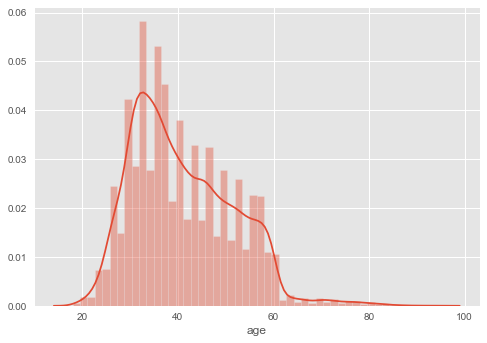

In [10]:
# Analysis of the body of distributions - Visualization of age distribution
sns.distplot(data['age']);

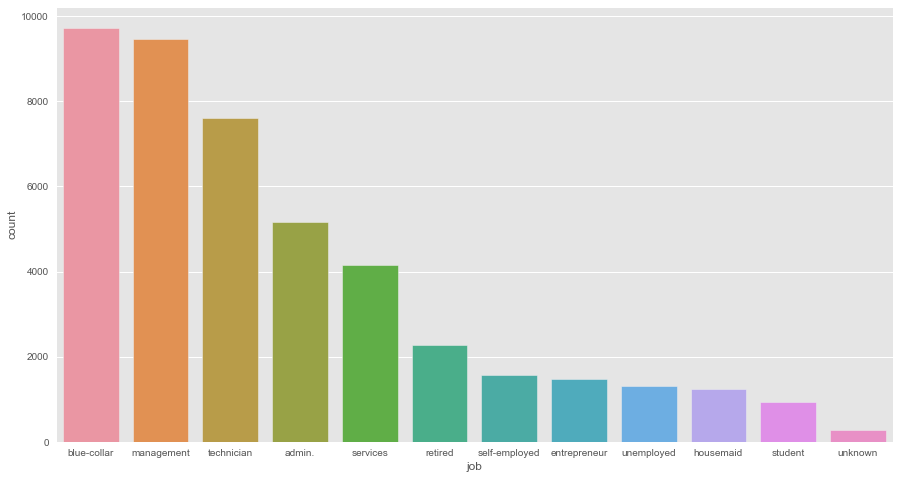

In [11]:
# Analysis of the body of distributions - Visualization of job distribution
plt.figure(figsize=(15,8))
sns.countplot(x = 'job',
              data = data,
             order = data['job'].value_counts().index);

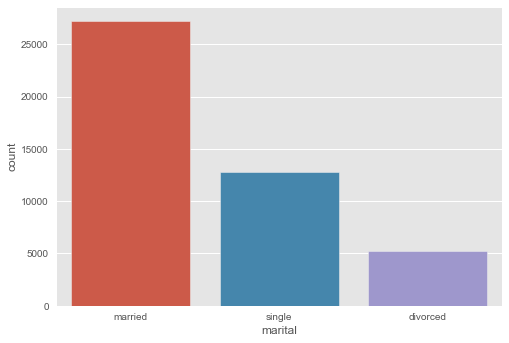

In [12]:
# Analysis of the body of distributions - Visualization of marital distribution
sns.countplot(data['marital']);

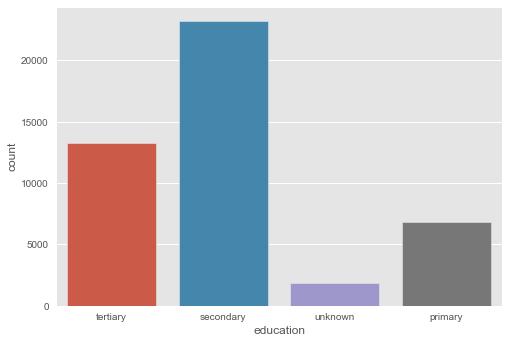

In [13]:
# Analysis of the body of distributions - Visualization of education distribution
sns.countplot(data['education']);

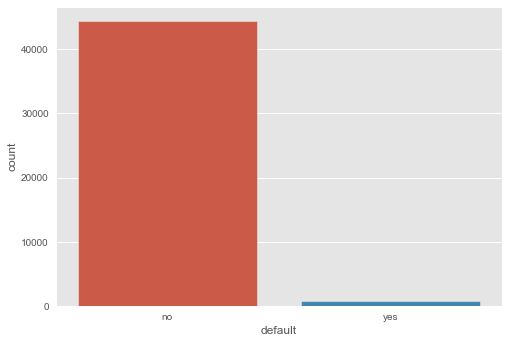

In [14]:
# Analysis of the body of distributions - Visualization of default distribution
sns.countplot(data['default']);

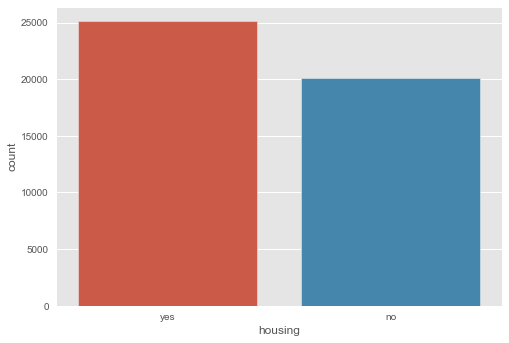

In [15]:
# Analysis of the body of distributions - Visualization of housing distribution
sns.countplot(data['housing']);

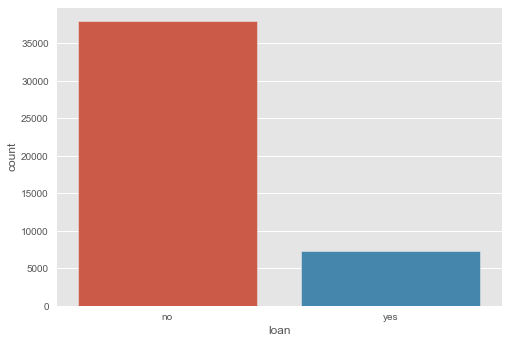

In [16]:
# Analysis of the body of distributions - Visualization of loan distribution
sns.countplot(data['loan']);

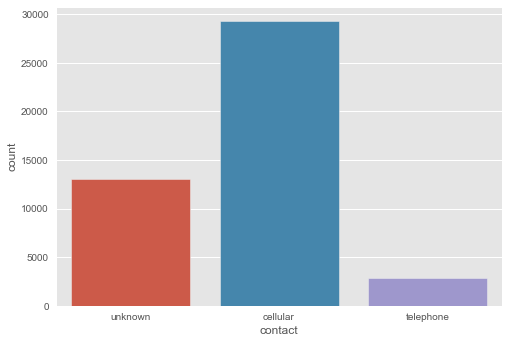

In [17]:
# Analysis of the body of distributions - Visualization of contact distribution
sns.countplot(data['contact']);

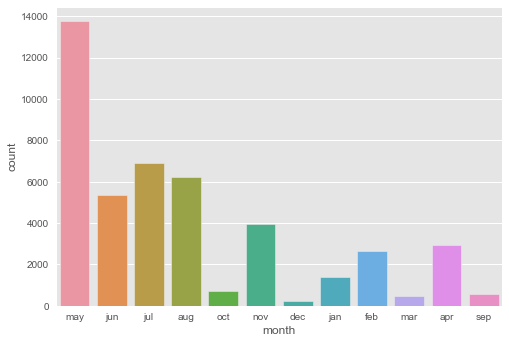

In [18]:
# Analysis of the body of distributions - Visualization of month distribution
sns.countplot(data['month']);

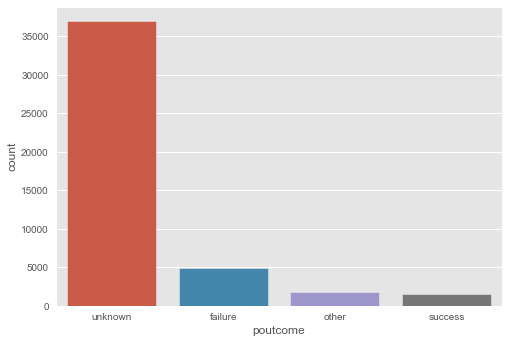

In [19]:
# Analysis of the body of distributions - Visualization of poutcome distribution
sns.countplot(data['poutcome']);

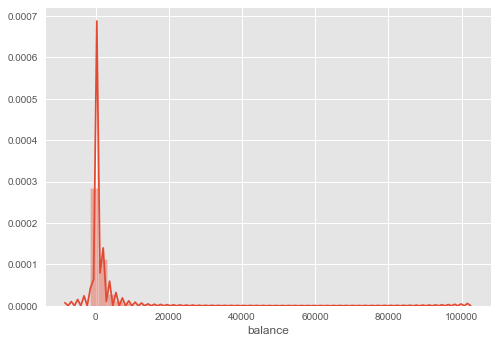

In [20]:
# Analysis of the body of distributions - Visualization of balance distribution
sns.distplot(data['balance']);

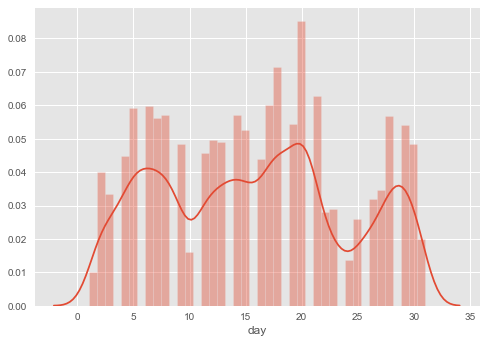

In [21]:
# Analysis of the body of distributions - Visualization of day distribution
sns.distplot(data['day']);

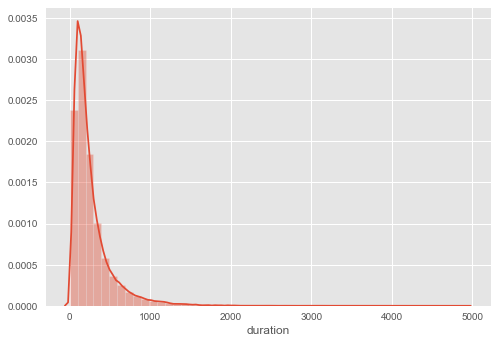

In [22]:
# Analysis of the body of distributions - Visualization of duration distribution
sns.distplot(data['duration']);

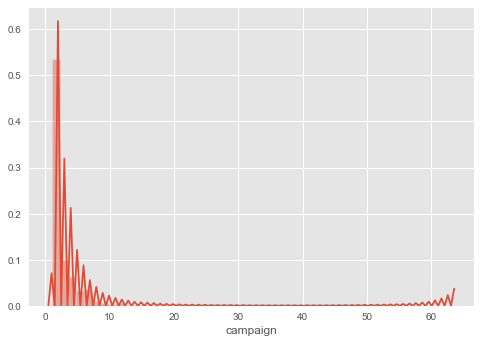

In [23]:
# Analysis of the body of distributions - Visualization of campaign distribution
sns.distplot(data['campaign']);

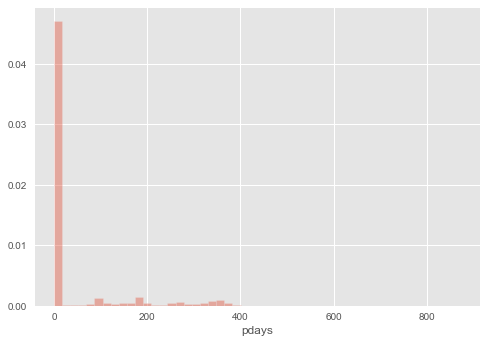

In [24]:
# Analysis of the body of distributions - Visualization of pdays distribution
sns.distplot(data['pdays']);

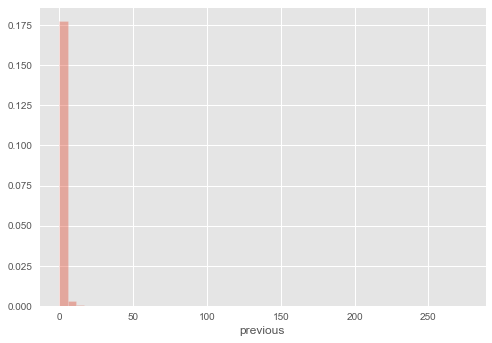

In [25]:
# Analysis of the body of distributions - Visualization of previous distribution
sns.distplot(data['previous']);

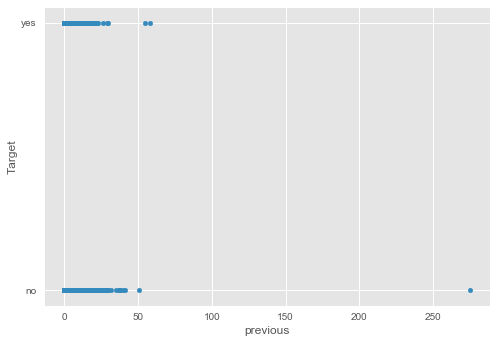

In [26]:
data.plot(x='previous', y='Target', kind='scatter');

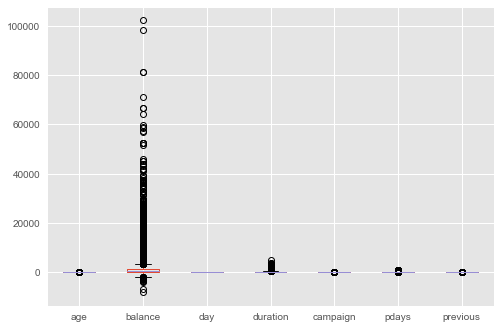

In [27]:
data.plot(kind='box');

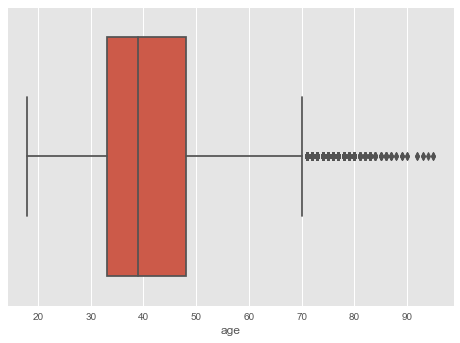

In [28]:
# Analysis of the body of distributions - Visualization of age distribution
ax = sns.boxplot(x=data["age"])

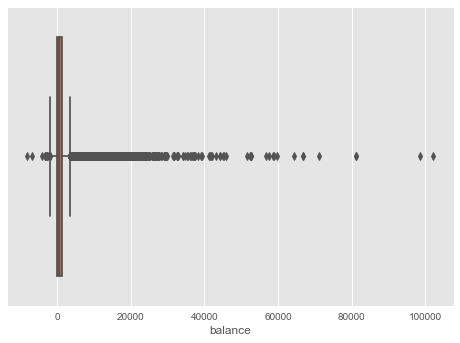

In [29]:
# Analysis of the body of distributions - Visualization of balance distribution
ax = sns.boxplot(x=data["balance"])

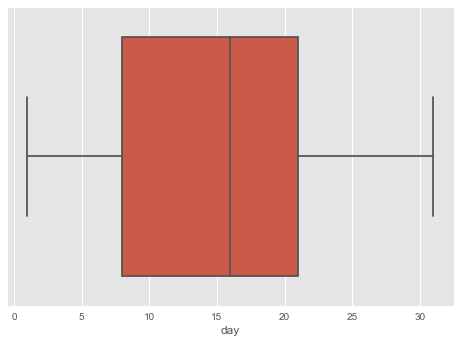

In [30]:
ax = sns.boxplot(x="day", data=data)

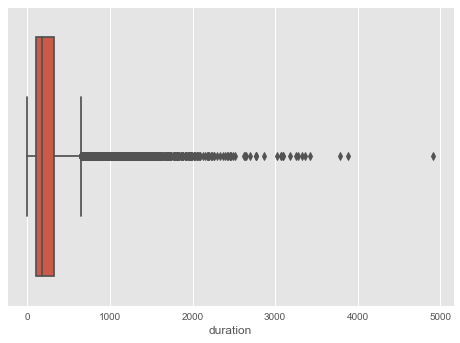

In [31]:
# Analysis of the body of distributions - Visualization of duration distribution
ax = sns.boxplot(x=data["duration"])

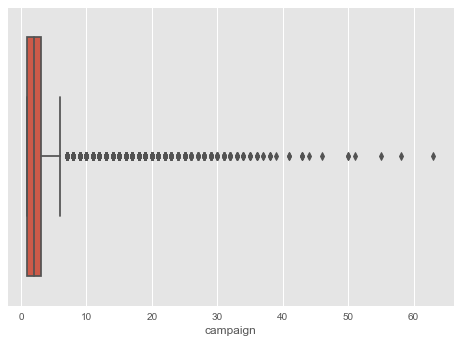

In [32]:
# Analysis of the body of distributions - Visualization of campaign distribution
ax = sns.boxplot(x=data["campaign"])

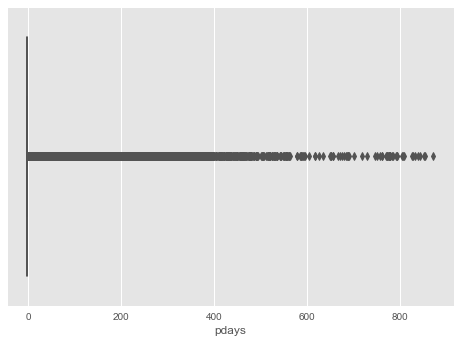

In [33]:
# Analysis of the body of distributions - Visualization of pdays distribution
ax = sns.boxplot(x=data["pdays"])

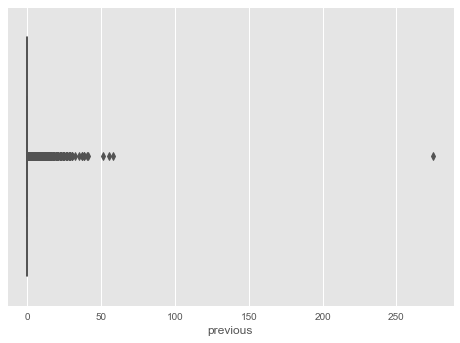

In [34]:
# Analysis of the body of distributions - Visualization of previous campaign contact distribution
ax = sns.boxplot(x=data["previous"])

#### Missing Values

In [35]:
# Missing values in each variable
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### To Note:
As shown above, there dataset does not contain null values. However, with further analysis from the visualizatin and univariate analysis above, it is clear that some columns contain 'unknown' values which can be considered as null values.

1. job: unknown (0.64%)
2. education: unknown (4.11%)
3. contact: unknown (28.80%)
4. poutcome: unknown (81.75%)


#### Treatment Strategies:
1. Given that job and education have only small portions of data points with unknown values, such points can be imputed with the mode value.
2. For contact, it is clear that cellular is more prevalent than telephone and unknown values can also be imputed with the mode value.
3. For poutcome, however, a better strategy might be to drop the column as the outcome of the previous marketing campaign is largely unknown.

**Outliers:**

As shown in the boxplots above:
- age range is 18 to 95 yrs: although the age range seems to be skewed but it is not unreasonble when considering the problem statement. 
- balance range is -8,019 to 102,127: the balance range might also contain outliers but given the business domain it can be justified as legal values.
- day range is 1 to 31: normal range for calendar months; for Feb, no values above 28 days
- duration Range is 0 to 4,918 seconds: some values might be considered outliers but the max duration is about and  hour and 20 minute phone call, so it is not unreasonable business-wise.
- campaign range is 1 to 63: skewed
- pdays range is -1 to 871: skewed
- previous range is 0 to 275: skewed

### 2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

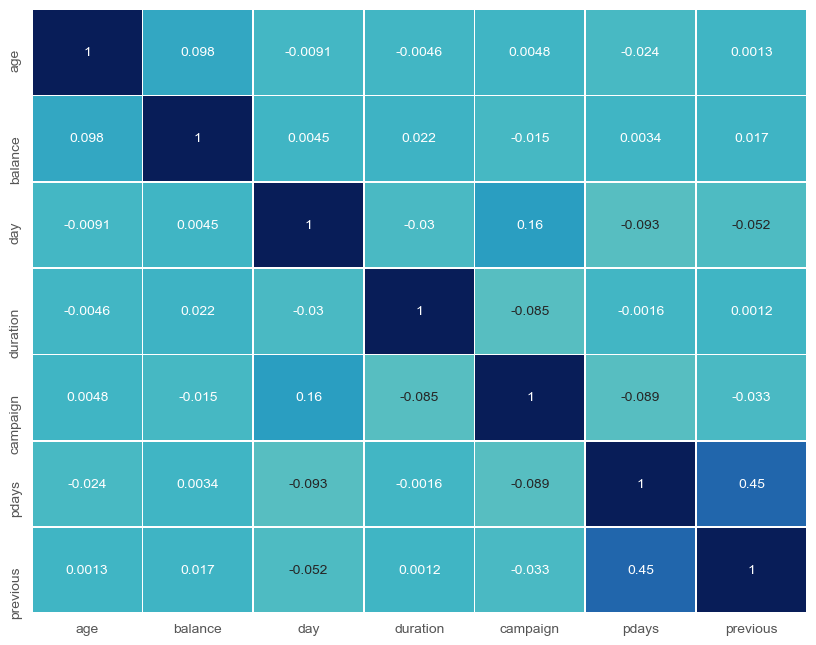

In [36]:
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

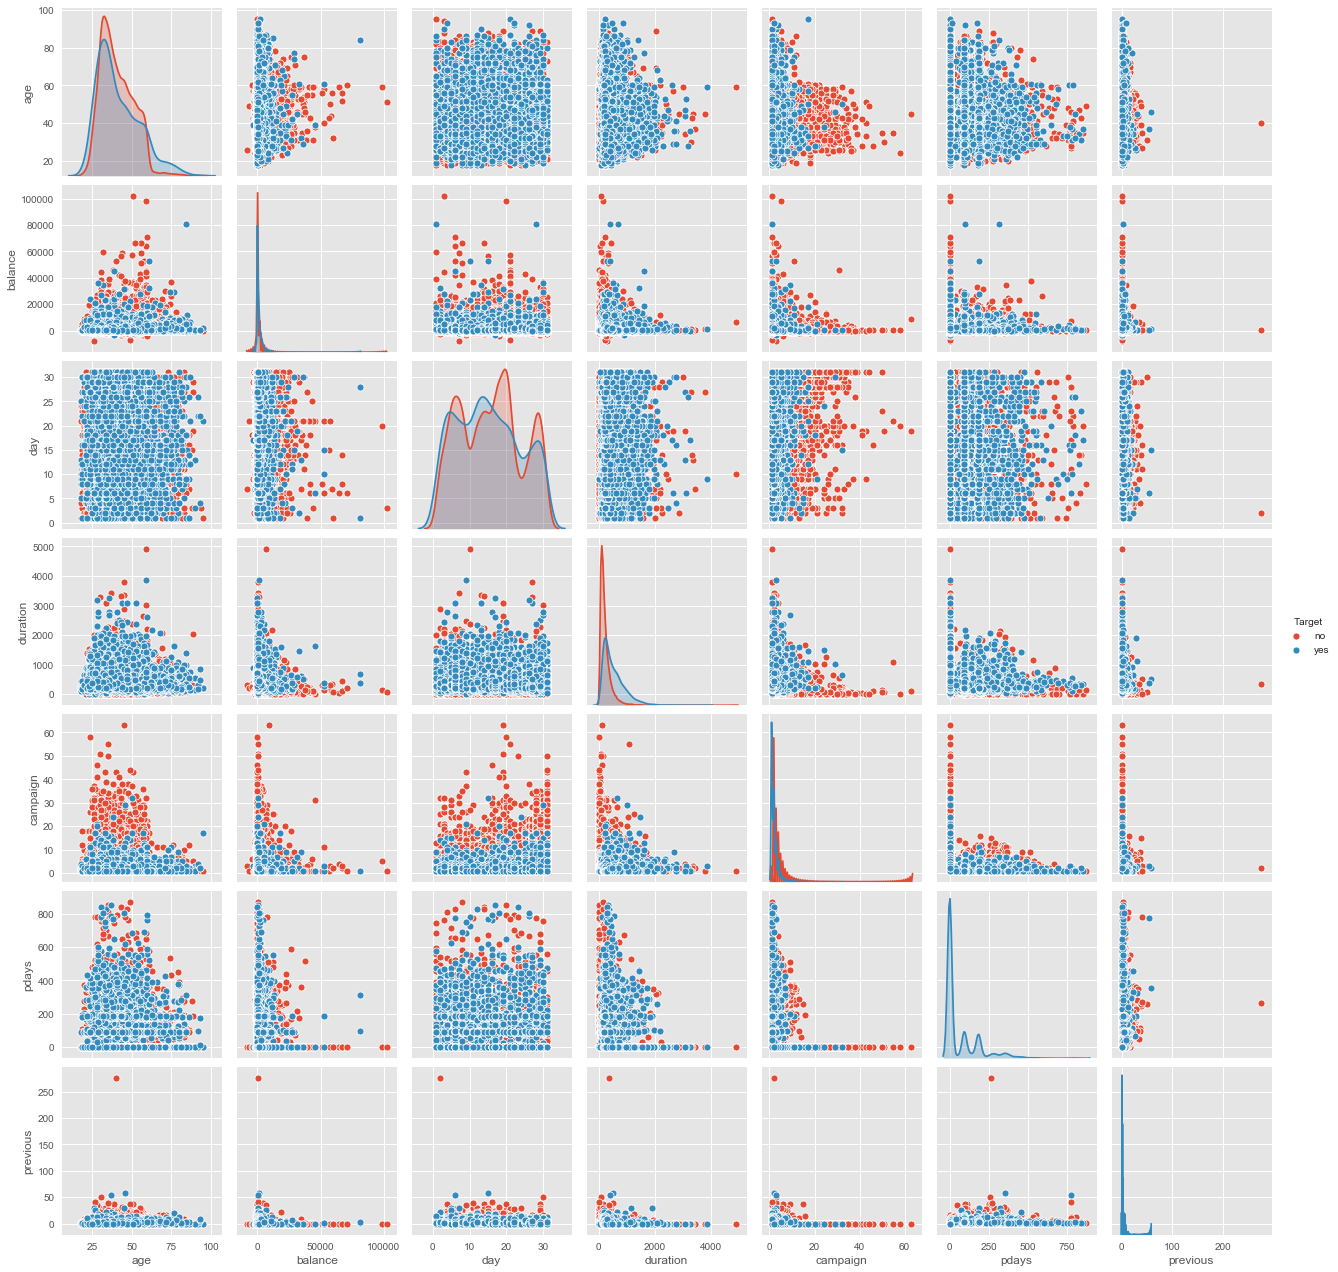

In [37]:
sns.pairplot(data, hue="Target");

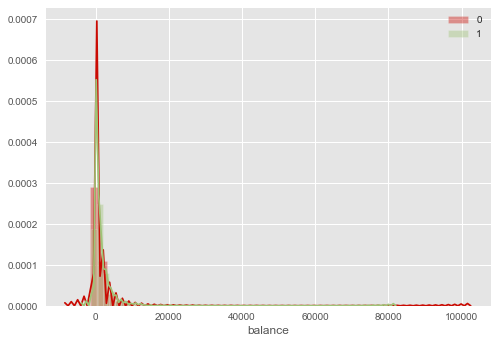

In [38]:
sns.distplot(data[data['Target']=='no']['balance'],color='r',label=0)
sns.distplot(data[data['Target']=='yes']['balance'],color='g',label=1)
plt.legend()
plt.show()

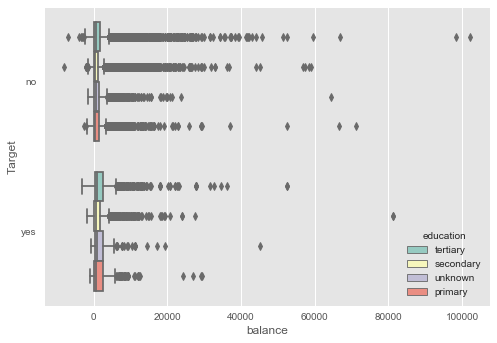

In [39]:
ax = sns.boxplot(x="balance", y="Target", hue="education", data=data, palette="Set3")

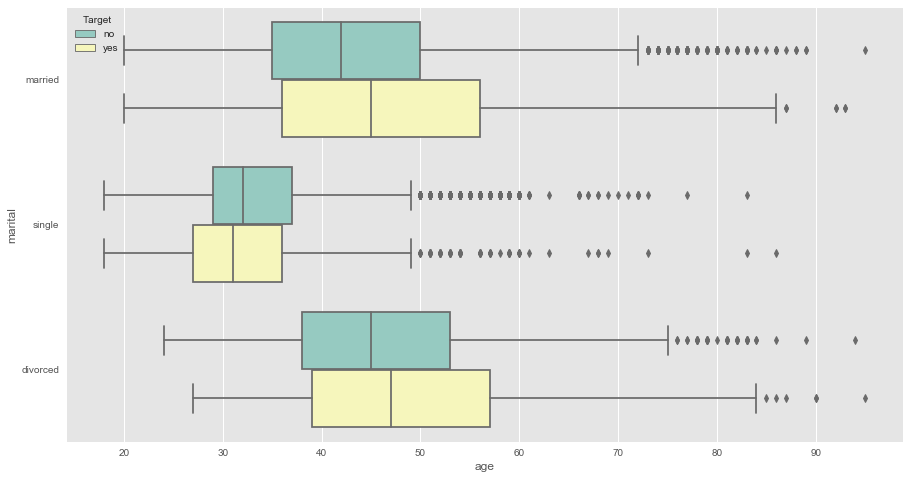

In [40]:
# There seems to be an association between marital status and target variable; 
# married and divorced seem relatively more likely to subscribe term deposit.
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="age", y="marital", hue="Target", data=data, palette="Set3")

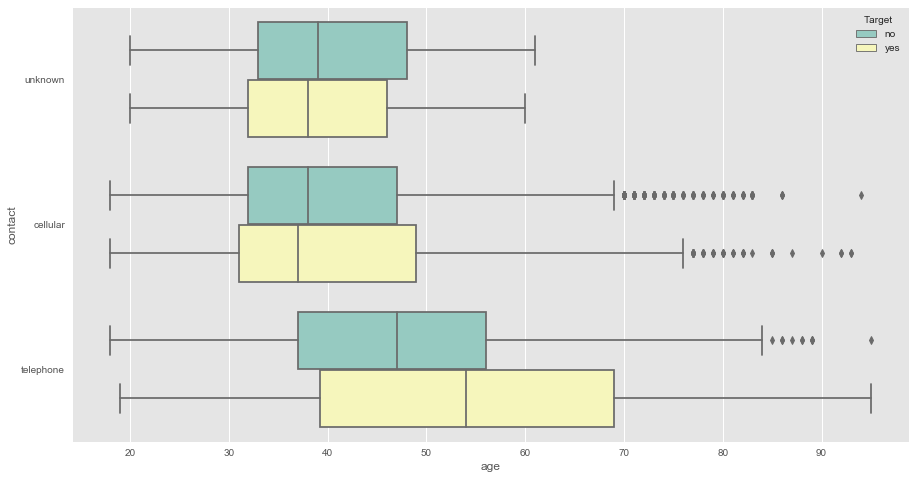

In [41]:
# Phone contacts seems to yeild more subscriptions for term deposit
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="age", y="contact", hue="Target", data=data, palette="Set3")

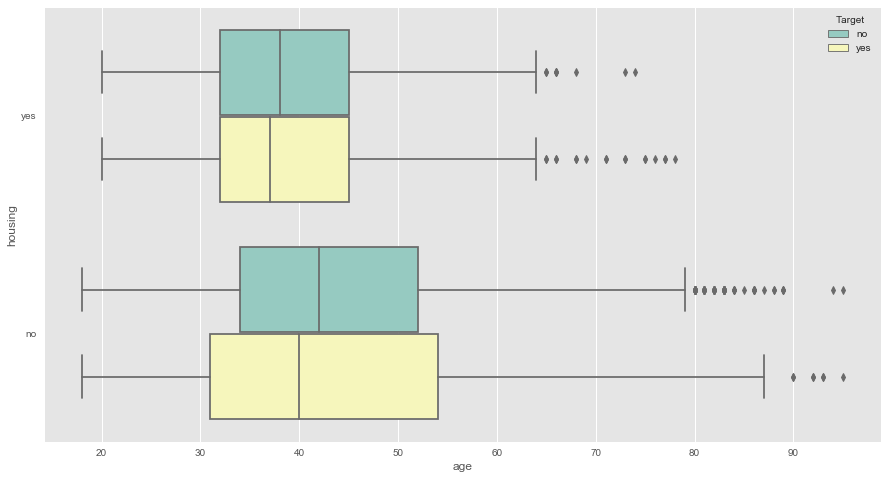

In [42]:
# Housing: customers with no housing loan seem more likely to subscribe to term deposite
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="age", y="housing", hue="Target", data=data, palette="Set3")

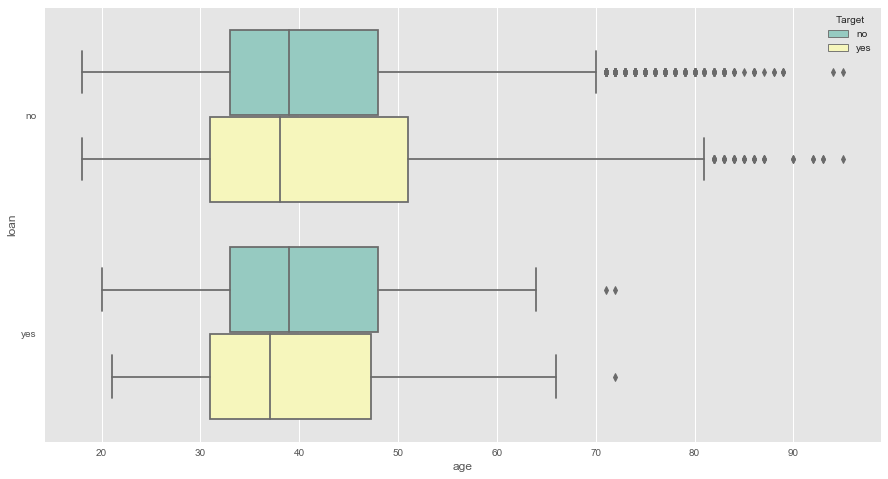

In [43]:
# Loan: customers who have no loans seem more likely to subscribe to term deposite
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="age", y="loan", hue="Target", data=data, palette="Set3")

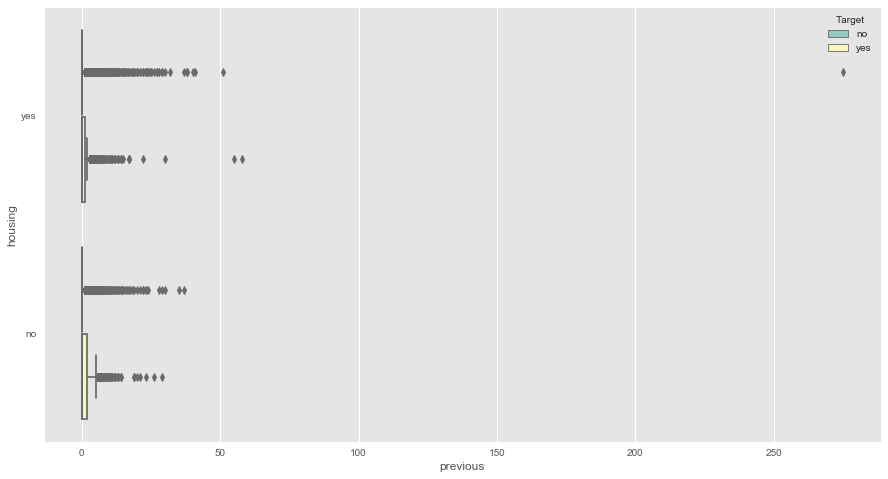

In [44]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="previous", y="housing", hue="Target", data=data, palette="Set3")

#### Findings

- There seems to be an association between marital status and target variable; married and divorced seem relatively more likely to subscribe term deposit.
- Phone contacts seems to yeild more subscriptions for term deposit
- Customers with no housing loan seem more likely to subscribe to term deposite
- Customers who have no loans seem more likely to subscribe to term deposite

## Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [45]:
# Binning
# data['age group'] = pd.cut(x=data['age'], bins=[18, 25, 35, 45, 55, 65, 95])#, labels=['below 25', 'below 35', 'below 45', 'below 55', 'below 65', 'senior'])

# print(data['age'].skew())
# data["age"] = np.where(data["age"] < 18, 18, data['age'])
# data["age"] = np.where(data["age"] > 70, 70, data['age'])
# print(data['age'].skew())
# sns.distplot(data['age']);

In [46]:
# Replace unknown values with mode
data.loc[data.job == 'unknown', 'job'] = data.job.mode()[0]
data.loc[data.education == 'unknown', 'education'] = data.education.mode()[0]
data.loc[data.contact == 'unknown', 'contact'] = data.contact.mode()[0]

# Drop poutcome column
data.drop(columns=['poutcome'], inplace=True)

In [47]:
# Change data types to Category
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
data[cols] = data[cols].astype('category')

In [48]:
# Convert the target variable to 0 or 1 
data["Target"] = data["Target"].map({"yes": 1, "no": 0})

In [49]:
# Create One-hot-encoding for categorical variables 
# and take k-1 of the columns
data=pd.get_dummies(data, columns=cols)#, drop_first=True)
data.head(10)

age  balance  day  duration  campaign  pdays  previous  Target  job_admin.  \
0   58     2143    5       261         1     -1         0       0           0   
1   44       29    5       151         1     -1         0       0           0   
2   33        2    5        76         1     -1         0       0           0   
3   47     1506    5        92         1     -1         0       0           0   
4   33        1    5       198         1     -1         0       0           0   
5   35      231    5       139         1     -1         0       0           0   
6   28      447    5       217         1     -1         0       0           0   
7   42        2    5       380         1     -1         0       0           0   
8   58      121    5        50         1     -1         0       0           0   
9   43      593    5        55         1     -1         0       0           0   

   job_blue-collar  ...  month_dec  month_feb  month_jan  month_jul  \
0                0  ...          0          0          0          0   
1                0  ...          0          0          0          0   
2                0  ...          0          0          0          0   
3                1  ...          0          0          0          0   
4                1  ...          0          0          0          0   
5                0  ...          0          0          0          0   
6                0  ...          0          0          0          0   
7                0  ...          0          0          0          0   
8                0  ...          0          0          0          0   
9                0  ...          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0          0          0          1          0          0          0  
1          0          0          1          0          0          0  
2          0          0          1          0          0          0  
3          0          0          1          0          0          0  
4          0          0          1          0          0          0  
5          0          0          1          0          0          0  
6          0          0          1          0          0          0  
7          0          0          1          0          0          0  
8          0          0          1          0          0          0  
9          0          0          1          0          0          0  

[10 rows x 45 columns]

In [50]:
# Transform the data i.e. scale / normalize if required
#data['campaign'] = data['campaign'].value_counts(normalize=True)
#data['pdays'] = data['pdays'].value_counts(normalize=True)
#data['previous'] = data['previous'].value_counts(normalize=True)
#data = data.fillna(0) 
#data.isnull().values.sum()

In [51]:
#data.info()

In [52]:
# Create the training set and test set in ratio of 70:30
features = [col for col in data.columns if col != 'Target']

X_train, X_test, y_train, y_test = train_test_split(data[features], data['Target'], test_size=0.30, random_state=1)
X_train.shape, X_test.shape

((31647, 44), (13564, 44))

## Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

#### Logistic Regression

In [53]:
# Fit the model on train
lr = LogisticRegression(solver="liblinear", random_state=1)
lr.fit(X_train, y_train)

# Predict on test
y_predict = lr.predict(X_test)

coef_df = pd.DataFrame(lr.coef_)
coef_df['intercept'] = lr.intercept_
coef_df

0    1    2    3     4    5    6    7     8     9  ...    35    36  \
0 -0.00 0.00 0.00 0.00 -0.11 0.00 0.08 0.12 -0.26 -0.53  ... -0.21 -1.05   

     37    38   39    40    41   42   43  intercept  
0 -0.73 -0.50 1.44 -0.95 -0.75 1.02 0.97      -0.85  

[1 rows x 45 columns]

In [54]:
model_score = lr.score(X_test, y_test)
print(model_score)

0.892214685933353


LR Accuracy: 0.892214685933353

LR Precision: 0.5612104539202201

LR Recall: 0.26305609284332687

LR F1 Score: 0.3582089552238806

LR Roc Auc Score: 0.6182507634781856


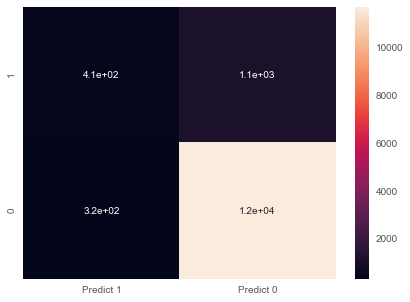

In [55]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

acc_lr = accuracy_score(y_test,y_predict)
rec_lr = recall_score(y_test,y_predict)
pre_lr = precision_score(y_test,y_predict)
f1_lr = f1_score(y_test,y_predict)
roc_lr = roc_auc_score(y_test,y_predict)

print("LR Accuracy:", accuracy_score(y_test,y_predict))
print()
print("LR Precision:", precision_score(y_test,y_predict))
print()
print("LR Recall:", recall_score(y_test,y_predict))
print()
print("LR F1 Score:", f1_score(y_test,y_predict))
print()
print("LR Roc Auc Score:", roc_auc_score(y_test,y_predict))

**The confusion matrix**

True Positives (TP): we correctly predicted that a customer is relatively more likely to subscribe term deposit and thus will increase their hit ratio 

True Negatives (TN): we correctly predicted that a customer is not likely to subscribe term deposit and thus will not increase their hit ratio 

False Positives (FP): we incorrectly predicted that a customer is relatively more likely to subscribe term deposit and thus will increase their hit ratio (a "Type I error"). Falsely predict positive Type I error.

False Negatives (FN): we incorrectly predicted that a customer is not relatively more likely to subscribe term deposit and thus will not increase their hit ratio (a "Type II error"). Falsely predict negative Type II error.

In [56]:
# Store the metrics results for this model in the dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 
                          'accuracy': acc_lr,  
                          'precision': pre_lr, 
                          'recall': rec_lr,
                          'f1':f1_lr, 
                          'roc_auc':roc_lr})
resultsDf = resultsDf[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62

#### Decision Tree

In [57]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [58]:
print('Training Accuracy: ', dTree.score(X_train, y_train))
print('Testing Accuracy: ', dTree.score(X_test, y_test))

Training Accuracy:  0.8926596517837394
Testing Accuracy:  0.8913299911530522


0.8913299911530522
dTree Accuracy: 0.8913299911530522

dTree Precision: 0.5562043795620438

dTree Recall: 0.24564796905222436

dTree F1 Score: 0.3407871198568873

dTree Roc Auc Score: 0.6101710252320142


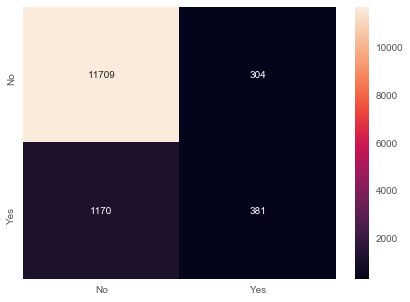

In [59]:
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

acc_dt = accuracy_score(y_test,y_predict)
rec_dt = recall_score(y_test,y_predict)
pre_dt = precision_score(y_test,y_predict)
f1_dt = f1_score(y_test,y_predict)
roc_dt = roc_auc_score(y_test,y_predict)

print("dTree Accuracy:", accuracy_score(y_test,y_predict))
print()
print("dTree Precision:", precision_score(y_test,y_predict))
print()
print("dTree Recall:", recall_score(y_test,y_predict))
print()
print("dTree F1 Score:", f1_score(y_test,y_predict))
print()
print("dTree Roc Auc Score:", roc_auc_score(y_test,y_predict))

In [60]:
# Print the feature importance of the decision model
pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending=False)

Imp
duration            0.70
pdays               0.14
housing_no          0.13
month_may           0.02
housing_yes         0.02
marital_married     0.00
age                 0.00
month_aug           0.00
loan_no             0.00
loan_yes            0.00
contact_cellular    0.00
contact_telephone   0.00
month_apr           0.00
month_feb           0.00
month_dec           0.00
default_no          0.00
month_jan           0.00
month_jul           0.00
month_jun           0.00
month_mar           0.00
month_nov           0.00
month_oct           0.00
default_yes         0.00
education_secondary 0.00
education_tertiary  0.00
balance             0.00
day                 0.00
campaign            0.00
previous            0.00
job_admin.          0.00
job_blue-collar     0.00
job_entrepreneur    0.00
job_housemaid       0.00
job_management      0.00
job_retired         0.00
job_self-employed   0.00
job_services        0.00
job_student         0.00
job_technician      0.00
job_unemployed      0.00
marital_divorced    0.00
marital_single      0.00
education_primary   0.00
month_sep           0.00

From the result above, it is clear tha the following variables contribute to successful subscription to term deposite
 - duration
 - pdays
 - housing_no
 - month_may
 - housing_yes

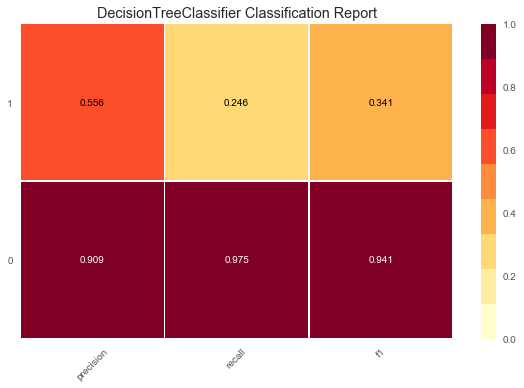

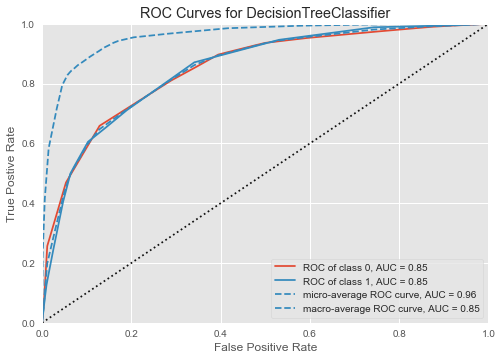

In [61]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 
                          'accuracy': acc_dt,
                          'precision': pre_dt,
                          'recall': rec_dt, 
                          'f1':f1_dt, 
                          'roc_auc':roc_dt})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62
0        Decision Tree      0.89       0.56    0.25 0.34     0.61

#### Ensemble Models - Bagging

In [63]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9021675022117369
bgcl Accuracy: 0.9021675022117369

bgcl Precision: 0.5921052631578947

bgcl Recall: 0.46421663442940037

bgcl F1 Score: 0.5204192265992049

bgcl Roc Auc Score: 0.7114640152085402


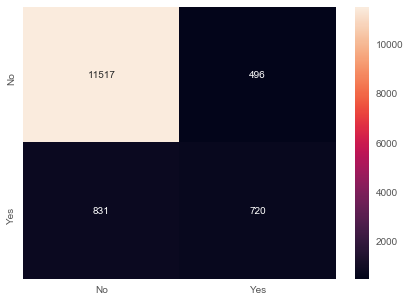

In [64]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


acc_bgcl = accuracy_score(y_test,y_predict)
rec_bgcl = recall_score(y_test,y_predict)
pre_bgcl = precision_score(y_test,y_predict)
f1_bgcl = f1_score(y_test,y_predict)
roc_bgcl = roc_auc_score(y_test,y_predict)

print("bgcl Accuracy:", accuracy_score(y_test,y_predict))
print()
print("bgcl Precision:", precision_score(y_test,y_predict))
print()
print("bgcl Recall:", recall_score(y_test,y_predict))
print()
print("bgcl F1 Score:", f1_score(y_test,y_predict))
print()
print("bgcl Roc Auc Score:", roc_auc_score(y_test,y_predict))

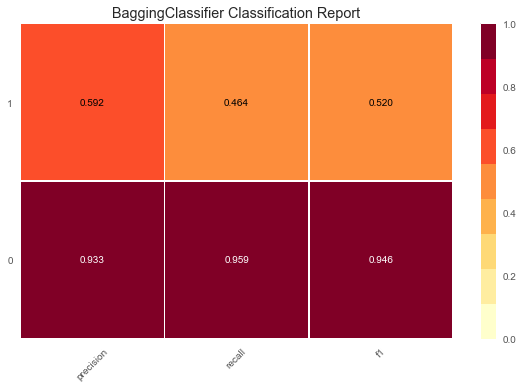

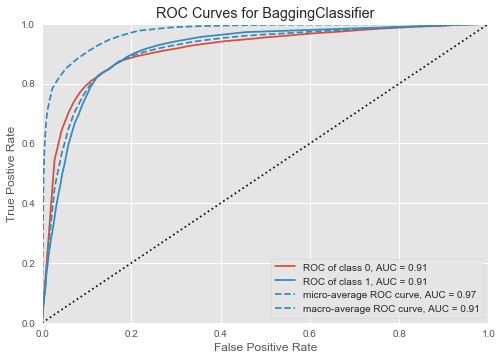

In [65]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [66]:
# Store the metrics results for this model in the dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 
                          'accuracy': acc_bgcl,
                          'precision': pre_bgcl, 
                          'recall': rec_bgcl, 
                          'f1':f1_bgcl, 
                          'roc_auc':roc_bgcl})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62
0        Decision Tree      0.89       0.56    0.25 0.34     0.61
0              Bagging      0.90       0.59    0.46 0.52     0.71

#### Ensemble Models - Adaboost

In [67]:
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8923621350634031
abcl Accuracy: 0.8923621350634031

abcl Precision: 0.5517633674630261

abcl Recall: 0.3127014829142489

abcl F1 Score: 0.3991769547325103

abcl Roc Auc Score: 0.6399518402667473


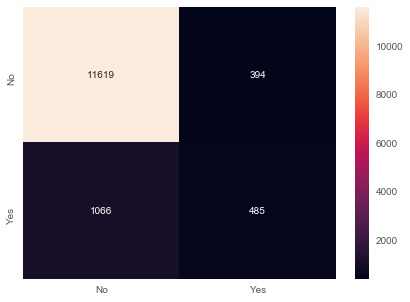

In [68]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


acc_abcl = accuracy_score(y_test,y_predict)
rec_abcl = recall_score(y_test,y_predict)
pre_abcl = precision_score(y_test,y_predict)
f1_abcl = f1_score(y_test,y_predict)
roc_abcl = roc_auc_score(y_test,y_predict)

print("abcl Accuracy:", accuracy_score(y_test,y_predict))
print()
print("abcl Precision:", precision_score(y_test,y_predict))
print()
print("abcl Recall:", recall_score(y_test,y_predict))
print()
print("abcl F1 Score:", f1_score(y_test,y_predict))
print()
print("abcl Roc Auc Score:", roc_auc_score(y_test,y_predict))

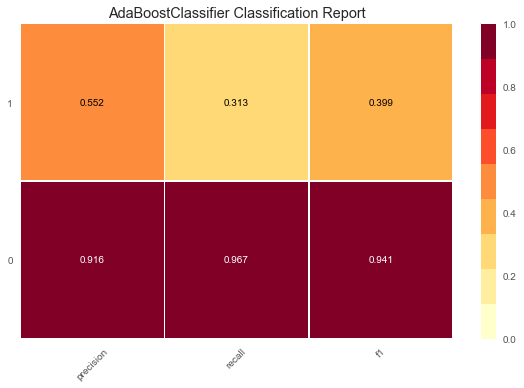

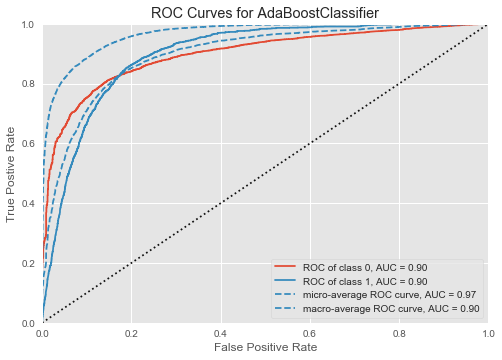

In [69]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators=50, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators=50, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [70]:
# Store the metrics results for this model in the dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 
                          'accuracy': acc_abcl, 
                          'precision': pre_abcl, 
                          'recall': rec_abcl,
                          'f1':f1_abcl, 
                          'roc_auc':roc_abcl})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62
0        Decision Tree      0.89       0.56    0.25 0.34     0.61
0              Bagging      0.90       0.59    0.46 0.52     0.71
0          AdaBoosting      0.89       0.55    0.31 0.40     0.64

#### Ensemble Models - Gradient Boost

In [71]:
# Gradient Boosting
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8973754054851076
gbcl Accuracy: 0.8973754054851076

gbcl Precision: 0.5975460122699386

gbcl Recall: 0.31399097356544164

gbcl F1 Score: 0.41166525781910396

gbcl Roc Auc Score: 0.643343609649615


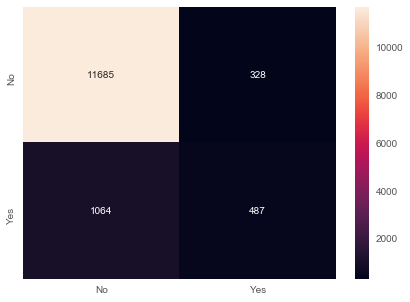

In [72]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


acc_gbcl = accuracy_score(y_test,y_predict)
rec_gbcl = recall_score(y_test,y_predict)
pre_gbcl = precision_score(y_test,y_predict)
f1_gbcl = f1_score(y_test,y_predict)
roc_gbcl = roc_auc_score(y_test,y_predict)

print("gbcl Accuracy:", accuracy_score(y_test,y_predict))
print()
print("gbcl Precision:", precision_score(y_test,y_predict))
print()
print("gbcl Recall:", recall_score(y_test,y_predict))
print()
print("gbcl F1 Score:", f1_score(y_test,y_predict))
print()
print("gbcl Roc Auc Score:", roc_auc_score(y_test,y_predict))

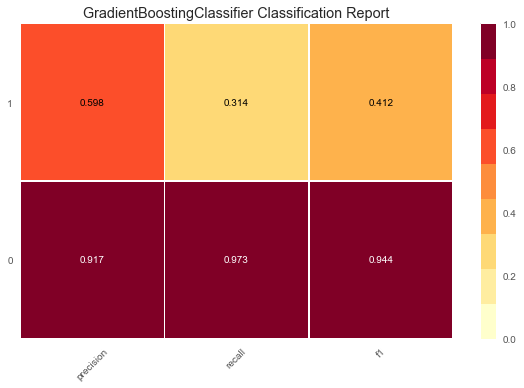

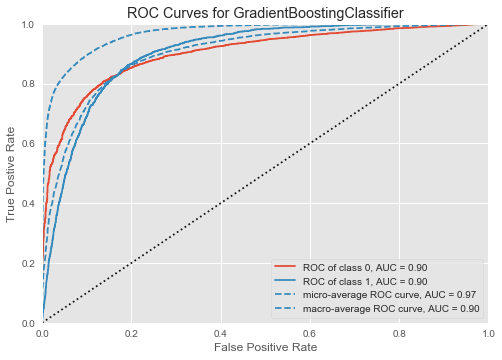

In [73]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=1))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [74]:
# Store the metrics results for this model in the dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 
                          'accuracy': acc_gbcl,
                          'precision': pre_gbcl, 
                          'recall': rec_gbcl, 
                          'f1':f1_gbcl, 
                          'roc_auc':roc_gbcl})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62
0        Decision Tree      0.89       0.56    0.25 0.34     0.61
0              Bagging      0.90       0.59    0.46 0.52     0.71
0          AdaBoosting      0.89       0.55    0.31 0.40     0.64
0       Gradient Boost      0.90       0.60    0.31 0.41     0.64

#### Ensemble Models - Random Forest

In [75]:
# Ensemble RF Classifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9024624004718372
rfcl Accuracy: 0.9024624004718372

rfcl Precision: 0.6027027027027027

rfcl Recall: 0.43133462282398455

rfcl F1 Score: 0.5028184892897406

rfcl Roc Auc Score: 0.697312196120225


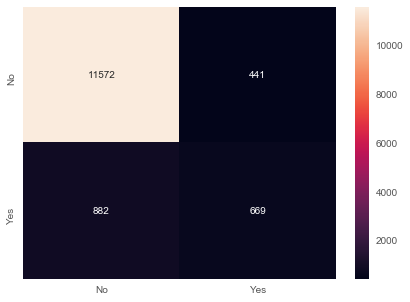

In [76]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


acc_rfcl = accuracy_score(y_test,y_predict)
rec_rfcl = recall_score(y_test,y_predict)
pre_rfcl = precision_score(y_test,y_predict)
f1_rfcl = f1_score(y_test,y_predict)
roc_rfcl = roc_auc_score(y_test,y_predict)

print("rfcl Accuracy:", accuracy_score(y_test,y_predict))
print()
print("rfcl Precision:", precision_score(y_test,y_predict))
print()
print("rfcl Recall:", recall_score(y_test,y_predict))
print()
print("rfcl F1 Score:", f1_score(y_test,y_predict))
print()
print("rfcl Roc Auc Score:", roc_auc_score(y_test,y_predict))

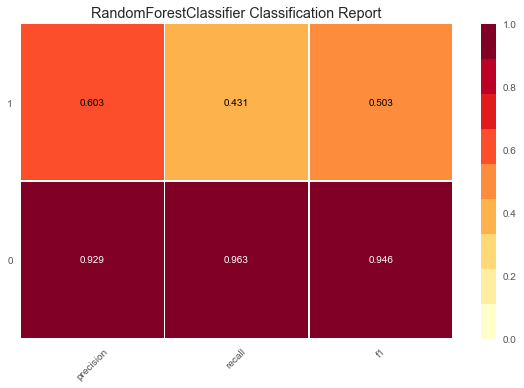

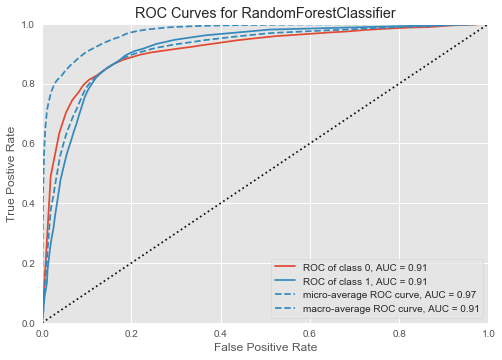

In [77]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [78]:
# Store the metrics results for this model in the dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 
                          'accuracy': acc_rfcl, 
                          'precision': pre_rfcl, 
                          'recall': rec_rfcl,
                          'f1':f1_rfcl, 
                          'roc_auc':roc_rfcl})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62
0        Decision Tree      0.89       0.56    0.25 0.34     0.61
0              Bagging      0.90       0.59    0.46 0.52     0.71
0          AdaBoosting      0.89       0.55    0.31 0.40     0.64
0       Gradient Boost      0.90       0.60    0.31 0.41     0.64
0        Random Forest      0.90       0.60    0.43 0.50     0.70

#### Models Performance Compared

In [79]:
resultsDf

Method  accuracy  precision  recall   f1  roc_auc
0  Logistic Regression      0.89       0.56    0.26 0.36     0.62
0        Decision Tree      0.89       0.56    0.25 0.34     0.61
0              Bagging      0.90       0.59    0.46 0.52     0.71
0          AdaBoosting      0.89       0.55    0.31 0.40     0.64
0       Gradient Boost      0.90       0.60    0.31 0.41     0.64
0        Random Forest      0.90       0.60    0.43 0.50     0.70

#### Performance Metrics

- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

#### Conclusion
1. Given the problem statement, the metric of interset seems to be recall as the bank is iterested in identifying potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. As suugested in the forum, using precision and recall is advised when focusing on small positive class — When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall.
2. Given the models metrics above, the models that seem to satisfy this requirement, to a certain degree, are bagging and random forests.